In [29]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.decomposition as dec
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.model_selection import StratifiedKFold, ShuffleSplit #, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

In [19]:
data_path_train = os.path.join(os.getcwd(),'Data', 'PartA', '20ng_train.csv')
data_path_test = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_test.csv')
data_path_labels = os.path.join(os.getcwd(), 'Data', 'PartA', '20ng_labels.csv')

ng_train = pd.read_csv(data_path_train, delimiter = ',', header=[0], compression ='bz2')
X_train = ng_train.drop('class', axis = 1)
y_train = ng_train['class']

ng_test = pd.read_csv(data_path_test, delimiter = ',', header=[0], compression ='bz2')
X_test = ng_test.drop('class', axis = 1)
y_test = ng_test['class']

ng_labels = pd.read_csv(data_path_labels, delimiter = ',', compression ='bz2')

In [25]:
# 1.1
#X_train.head(50)
X_train.describe()#.iloc[1].sort_values()
#X_train.info() # 5648 entries, 1000 features (word TF-IDF), 

#unique, counts = np.unique(y_train, return_counts=True)
#plt.bar(unique, counts)
#plt.title('Class Frequency')
#plt.xlabel('Class')
#plt.ylabel('Frequency')
#plt.show()

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,...,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000,5648.000000
mean,0.001708,0.001472,0.006335,0.002273,0.002466,0.004041,0.002923,0.001420,0.002057,0.001560,...,0.006102,0.003717,0.004887,0.003494,0.002800,0.006421,0.001851,0.006020,0.008144,0.006705
std,0.034360,0.016554,0.033866,0.026688,0.022362,0.030053,0.024208,0.018515,0.020301,0.020248,...,0.034573,0.028373,0.033153,0.027797,0.025441,0.037083,0.020132,0.036011,0.037727,0.039841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.956585,0.443807,0.565277,0.711480,0.529982,0.635985,0.560049,0.461537,0.657318,0.631932,...,0.487020,0.614346,0.698880,0.511068,0.596214,0.751603,0.561412,0.617048,0.438414,0.736056


In [26]:
#1.2 Compare testing set with training set

#X_test.head(50)
X_test.describe()
#X_test.info() # 5648 entries, 1000 features (word TF-IDF), 

# repercussions?

,__,ability,able,ac,accept,access,according,account,act,action,...,world,worth,wouldn,write,written,wrong,wrote,year,years,yes
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,0.002292,0.002168,0.007335,0.002817,0.002701,0.004449,0.003012,0.001716,0.001886,0.001745,...,0.006194,0.003018,0.005356,0.003746,0.003812,0.007960,0.001970,0.006214,0.008706,0.009449
std,0.032391,0.021397,0.034312,0.032169,0.021777,0.032393,0.026133,0.022855,0.019504,0.018376,...,0.041170,0.026231,0.033441,0.028779,0.032836,0.039182,0.020613,0.037389,0.041551,0.043570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.864159,0.469412,0.337561,0.620254,0.310053,0.504324,0.420903,0.632166,0.336667,0.387412,...,1.000000,0.490894,0.481298,0.434553,0.543384,0.470697,0.566179,0.537827,0.532047,0.590114


In [24]:
#not_null_accept = X_train['accept'][X_train['accept']>0]
#sns.distplot(non_null_accept)
not_null_words = X_train.nonzero()
not_null_words
sns.distplot(not_null_words)

AttributeError: 'DataFrame' object has no attribute 'nonzero'

In [5]:
# 2.4
amis = []
ks = list(range(2,13))
for k in ks:
    kmeans = KMeans(n_clusters=k,random_state=1000, n_init=50).fit(X_train)
    y = kmeans.predict(X_train)
    amis.append(adjusted_mutual_info_score(y_train, y, average_method='max'))

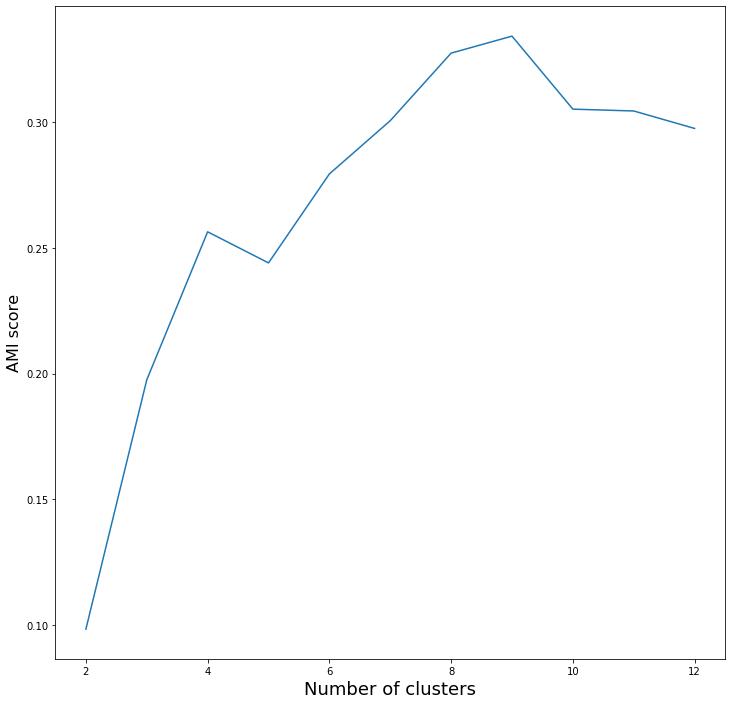

In [11]:
plt.figure(figsize=(12,12))
plt.plot(ks, amis)
plt.xlabel('Number of clusters', fontsize=18)
plt.ylabel('AMI score', fontsize=16)
plt.show()

In [12]:
kmeans4 = KMeans(n_clusters=4,random_state=1000, n_init=50).fit(X_train)
y4 = kmeans4.predict(X_train)

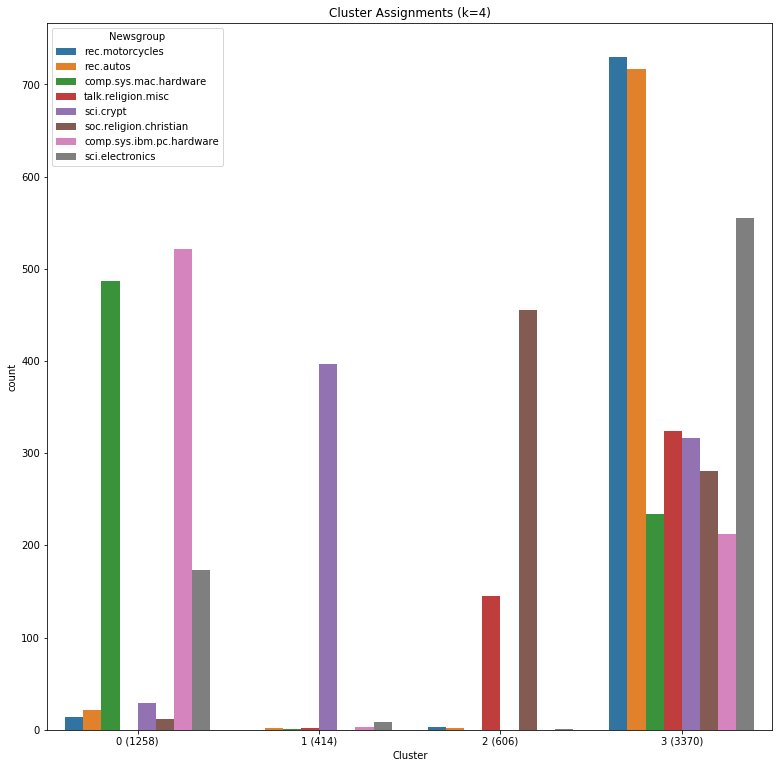

In [82]:
# 2.6
y_train_labels = list(map(lambda x: ng_labels.iloc[x].iloc[0], y_train))
assignments = pd.DataFrame(list(zip(y4, y_train_labels)), columns = ['Cluster', 'Newsgroup'])
plt.figure(figsize=(13,13))
ax = sns.countplot(data=assignments, x='Cluster', hue='Newsgroup')

ax.set_xticklabels(['0 (1258)','1 (414)','2 (606)','3 (3370)'])

plt.title('Cluster Assignments (k=4)')
plt.show()

In [32]:
# 3.2
gaussianNB = GaussianNB().fit(X_train, y_train)
predictions = gaussianNB.predict(X_test)
f1_score(predictions, y_test, average='macro')

0.561282319613507

In [33]:
# 3.4
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
f1s = []
for train_index_array, test_index_array in skf.split(X_train, y_train):
    train_instances = X_train.iloc[train_index_array]
    train_classes = y_train.iloc[train_index_array]
    
    test_instances = X_train.iloc[test_index_array]
    test_classes = y_train.iloc[test_index_array]
    
    lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0)
    lr.fit(X=train_instances, y=train_classes)
    predictions = lr.predict(test_instances)
    f1s.append(f1_score(predictions, test_classes, average='macro'))

In [34]:
print("Average F1 score: {}".format(np.mean(f1s)))
print("Standard deviation of F1 score: {}".format(np.std(f1s)))

Average F1 score: 0.6689909262264606
Standard deviation of F1 score: 0.016922045421971926


In [35]:
# 3.5 We will now optimise the Regularisation parameter C using cross-validation.
exponents = np.arange(-4, 5.5, 0.5)
Cs = list(map(lambda x: 10**x, exponents))

f1s_average_training = []
f1s_average_validation = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for reg_param in Cs:
    f1s_training = []
    f1s_validation = []
    
    for train_index_array, test_index_array in skf.split(X_train, y_train):
        train_instances = X_train.iloc[train_index_array]
        train_classes = y_train.iloc[train_index_array]

        test_instances = X_train.iloc[test_index_array]
        test_classes = y_train.iloc[test_index_array]

        lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=reg_param)
        lr.fit(X=train_instances, y=train_classes)
        
        predictions_training = lr.predict(train_instances)
        predictions_validation = lr.predict(test_instances)
        
        f1s_training.append(f1_score(predictions_training, train_classes, average='macro'))
        f1s_validation.append(f1_score(predictions_validation, test_classes, average='macro'))
    
    f1s_average_training.append(np.mean(f1s_training))
    f1s_average_validation.append(np.mean(f1s_validation))

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, wa

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages

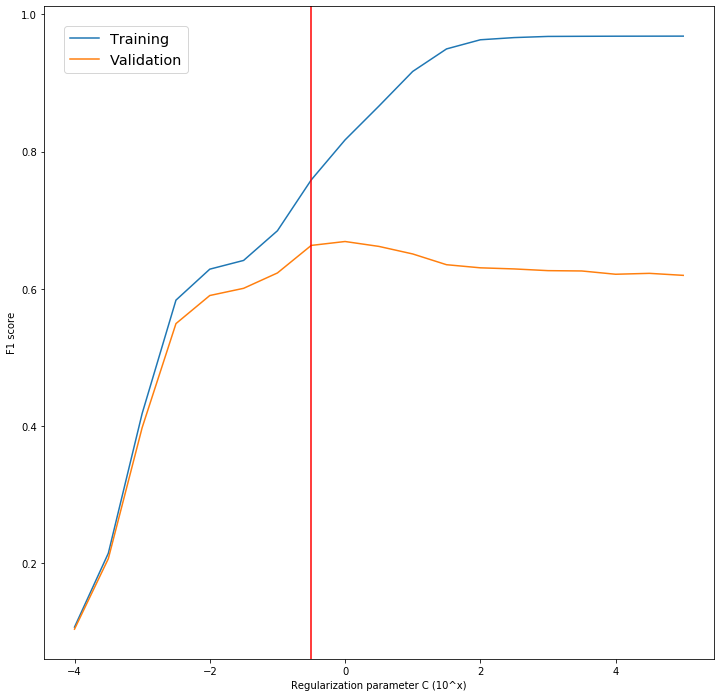

[0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0, 3162.2776601683795, 10000.0, 31622.776601683792, 100000.0]
[0.10426652383342358, 0.20693715644729807, 0.3978221586555387, 0.549401889558099, 0.5903162727489074, 0.6007943890141922, 0.6231661213731127, 0.6632928459845525, 0.6689909262264606, 0.6618615893645126, 0.6508673013752745, 0.6351927624582812, 0.6306581456843349, 0.6290397926441794, 0.6265514299120727, 0.626067344281533, 0.6212917640148401, 0.622603362670217, 0.6196887999912131]


In [70]:
plt.figure(figsize=(12,12))
plt.plot(exponents, f1s_average_training, label='Training')
plt.plot(exponents, f1s_average_validation, label='Validation')
plt.legend(bbox_to_anchor=(0.03, 0.97), loc='upper left', borderaxespad=0., fontsize='x-large')
plt.axvline(x=-0.5, color='red')
plt.xlabel('Regularization parameter C (10^x)')
plt.ylabel('F1 score')
plt.show()
print(Cs)
print(f1s_average_validation)

In [35]:
# 3.7
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=0, C=10 ** 0, max_iter=200)
lr.fit(X=X_train, y=y_train)
predictions = lr.predict(X_test)

In [36]:
print("F1-score on the test set: {}".format(f1_score(predictions, y_test, average='macro')))

F1-score on the test set: 0.6747698176259582


In [24]:
# Question B
data_path_bristol_day_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_DayAligned.csv')
data_path_bristol_site_aligned = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_SiteAligned.csv')
data_path_bristol_exploratory = os.path.join(os.getcwd(),'Data', 'PartB', 'BristolAir_Exploratory.csv')

bristol_day_aligned = pd.read_csv(data_path_bristol_day_aligned, delimiter = ',', header=[0], parse_dates=[1], index_col=[0, 1], compression ='bz2')
bristol_site_aligned = pd.read_csv(data_path_bristol_site_aligned, delimiter = ',', header=[0, 1], parse_dates=[0], compression ='bz2')
bristol_exploratory = pd.read_csv(data_path_bristol_exploratory, delimiter = ',', header=[0], compression ='bz2')

In [16]:
# 4.1
#bristol_exploratory.describe()
#bristol_exploratory.info()
#bristol_exploratory.head(50)
#unique, counts = np.unique(bristol_exploratory['SiteID'], return_counts=True)
#print(counts)

In [37]:
# 4.2
SiteIDS = range(0, 18)
table = pd.DataFrame(columns = ['SiteID', 'Number of samples', 'Missing data', 'Negative entries'])
for SiteID in SiteIDS:
    site = bristol_exploratory.loc[bristol_exploratory['SiteID'] == SiteID]
    
    site_count = site.shape[0]
    missing = site_count - site.dropna().shape[0]
    negative = site_count - ((site['NOx']>=0) & (site['NO2']>=0) & (site['NO']>=0)).sum()
    table = table.append({'SiteID' :  SiteID, 'Number of samples' :  site_count, 'Missing data' :  missing/site_count, 'Negative entries' :  negative/site_count}, ignore_index=True)
    
table
#table.to_latex(index=False)

,SiteID,Number of samples,Missing data,Negative entries
0,0.0,6446.0,0.016134,0.016134
1,1.0,163111.0,0.062902,0.062902
2,2.0,62990.0,0.043483,0.043531
3,3.0,25464.0,0.773327,0.781103
4,4.0,74787.0,0.020685,0.020726
5,5.0,113952.0,0.088283,0.088283
6,6.0,142141.0,0.074440,0.074468
7,7.0,115162.0,0.041950,0.044728
8,8.0,43824.0,0.210570,0.210570
9,9.0,22071.0,0.053011,0.053011


In [146]:
# 4.2 COMBINED missing & negative
SiteIDS = range(0, 18)
table = pd.DataFrame(columns = ['SiteID', 'Samples', 'Missing Samples %', 'Negative Samples %'])
for SiteID in SiteIDS:
    site = bristol_exploratory.loc[bristol_exploratory['SiteID'] == SiteID];
    site_count = site.shape[0];
    missing = site_count - site.dropna().shape[0]
    
    neg=0;
    for index, row in site.iterrows():
        if(row['NOx']<0 or row['NO2']<0 or row['NO']<0):
            neg = neg + 1
    
    #neg = site_count - (site['NOx', 'NO2', 'NO']>=0).sum()
    table = table.append({'SiteID' :  SiteID, 'Samples' :  site_count, 'Missing Samples %' :  missing/site_count*100, 'Negative Samples %' :  neg/site_count*100}, ignore_index=True)
    
#table

,SiteID,Samples,Missing Samples %,Negative Samples %
0,0.0,6446.0,1.613404,0.000000
1,1.0,163111.0,6.290195,0.000000
2,2.0,62990.0,4.348309,0.004763
3,3.0,25464.0,77.332705,0.777568
4,4.0,74787.0,2.068541,0.005349
5,5.0,113952.0,8.828279,0.000000
6,6.0,142141.0,7.444017,0.002814
7,7.0,115162.0,4.194960,0.277869
8,8.0,43824.0,21.056955,0.000000
9,9.0,22071.0,5.301074,0.000000


In [161]:
table.to_latex(index=False)
#bristol_exploratory.query('SiteID == 17').plot(figsize=(10,10))

'\\begin{tabular}{rrrr}\n\\toprule\n SiteID &   Samples &  Missing Samples \\% &  Negative Samples \\% \\\\\n\\midrule\n    0.0 &    6446.0 &           1.613404 &            0.000000 \\\\\n    1.0 &  163111.0 &           6.290195 &            0.000000 \\\\\n    2.0 &   62990.0 &           4.348309 &            0.004763 \\\\\n    3.0 &   25464.0 &          77.332705 &            0.777568 \\\\\n    4.0 &   74787.0 &           2.068541 &            0.005349 \\\\\n    5.0 &  113952.0 &           8.828279 &            0.000000 \\\\\n    6.0 &  142141.0 &           7.444017 &            0.002814 \\\\\n    7.0 &  115162.0 &           4.194960 &            0.277869 \\\\\n    8.0 &   43824.0 &          21.056955 &            0.000000 \\\\\n    9.0 &   22071.0 &           5.301074 &            0.000000 \\\\\n   10.0 &   96407.0 &           3.589988 &            0.004149 \\\\\n   11.0 &   20693.0 &           1.904026 &            0.086986 \\\\\n   12.0 &   45240.0 &          17.484527 &          

In [5]:
# 4.4
bristol_exploratory_clean = bristol_exploratory.query('SiteID != 3 & SiteID != 15')
bristol_exploratory_clean = bristol_exploratory_clean.drop('SiteID', axis=1)
bristol_exploratory_clean = bristol_exploratory_clean.drop('Loc.Lat', axis=1)
bristol_exploratory_clean = bristol_exploratory_clean.drop('Loc.Long', axis=1)
bristol_exploratory_clean.corr()#.to_latex(index=True)

,NOx,NO2,NO
NOx,1.000000,0.878016,0.988019
NO2,0.878016,1.000000,0.807853
NO,0.988019,0.807853,1.000000


/home/theo/Files/Programs/miniconda3/envs/ml/lib/python3.7/site-packages/pandas/core/generic.py:3947: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


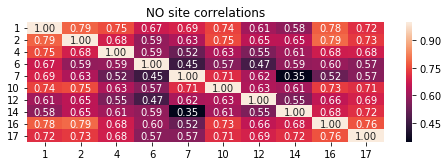

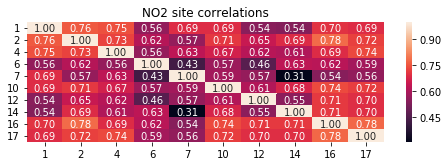

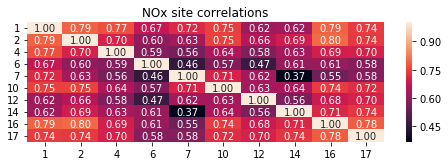

In [23]:
# 4.6
import mpctools.extensions.mplext as mpc
bristol_site_aligned_clean = bristol_site_aligned.drop('Date Time', axis=1)
bristol_site_aligned_clean_grouped = bristol_site_aligned_clean.groupby(axis=1, level=0)

for key, item in bristol_site_aligned_clean_grouped:
    plt.figure(figsize=(8, 2.2))
    plt.title(key + ' site correlations')
    mpc.plot_matrix(item.corr().values, mode='heatmap', show_val=True, labels=['1','2','4','6','7','10','12','14','16','17'])
    plt.show()

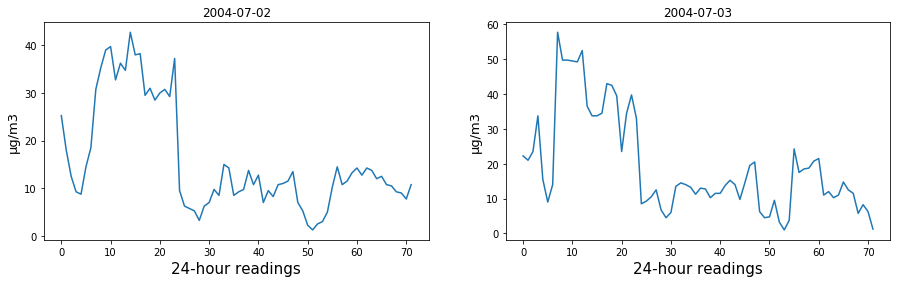

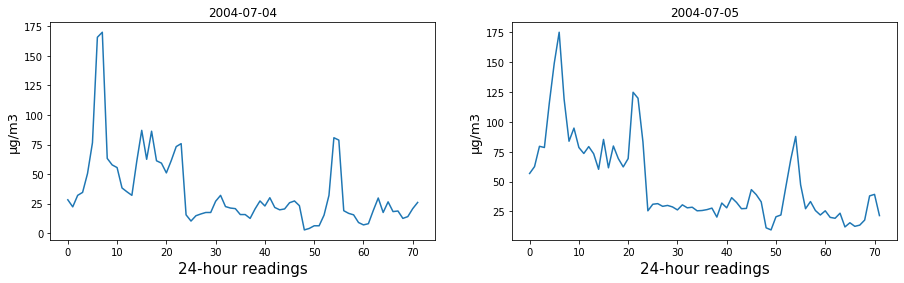

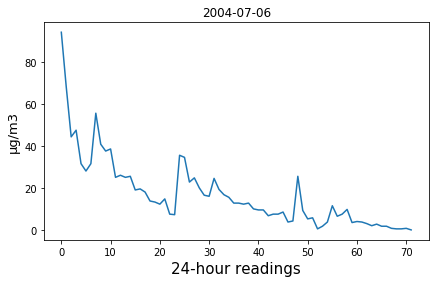

In [108]:
# 5.1
import matplotlib.gridspec as gridspec
x = range(0,72);
gs = gridspec.GridSpec(1, 5)

plt.figure(figsize=(40, 4))
ax = plt.subplot(gs[0, 0])
plt.plot(x, bristol_day_aligned.iloc[0])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-02')

ax = plt.subplot(gs[0, 1])
plt.plot(x, bristol_day_aligned.iloc[1])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-03')

plt.figure(figsize=(40, 4))
ax = plt.subplot(gs[0, 2])
plt.plot(x, bristol_day_aligned.iloc[2])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-04')

ax = plt.subplot(gs[0, 3])
plt.plot(x, bristol_day_aligned.iloc[3])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-05')

plt.figure(figsize=(40, 4))
ax = plt.subplot(gs[0, 4])
plt.plot(x, bristol_day_aligned.iloc[4])
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=13)
plt.title('2004-07-06')

plt.show()

In [75]:
bristol_day_aligned

0          1          2          3           4  \
SiteID Date                                                                 
1      2004-07-02  25.250000  18.000000  12.500000   9.250000    8.750000   
       2004-07-03  22.250000  21.000000  23.500000  33.750000   15.500000   
       2004-07-04  28.250000  22.250000  32.000000  34.500000   50.500000   
       2004-07-05  56.750000  62.500000  79.500000  78.500000  115.750000   
       2004-07-06  94.250000  68.250000  44.500000  47.670000   31.750000   
...                      ...        ...        ...        ...         ...   
16     2019-08-04  30.360938  20.272500  16.638750  18.981563   25.914375   
       2019-08-06  12.144375   4.494375   5.115938   4.350938    7.124063   
       2019-08-08  12.096563   6.932813   9.180000  17.069063   39.062813   
       2019-08-10   3.107813   4.590000   3.681563   3.585938    4.159688   
       2019-08-11   6.502500   4.685625   2.438438   5.068125    3.681563   

                            5           6           7          8          9  \
SiteID Date                                                                   
1      2004-07-02   14.500000   18.500000   30.750000  35.250000  39.000000   
       2004-07-03    9.000000   14.000000   57.750000  49.750000  49.750000   
       2004-07-04   76.500000  165.750000  170.000000  63.250000  57.750000   
       2004-07-05  149.000000  175.000000  119.000000  83.750000  94.750000   
       2004-07-06   28.250000   31.750000   55.750000  41.000000  37.750000   
...                       ...         ...         ...        ...        ...   
16     2019-08-04   25.531875   37.867500   41.357812  30.313126  43.844062   
       2019-08-06   12.670313   34.233750   57.614063  63.973125  66.698439   
       2019-08-08   60.482812  111.833438  116.805937  91.799998  73.870312   
       2019-08-10    5.163750    8.558438    9.945000  10.710000  16.877813   
       2019-08-11    5.594063    4.159688    6.837188   7.171875   9.610313   

                   ...         62         63         64         65         66  \
SiteID Date        ...                                                          
1      2004-07-02  ...  14.250000  13.750000  12.000000  12.500000  10.750000   
       2004-07-03  ...  12.000000  10.250000  11.000000  14.750000  12.500000   
       2004-07-04  ...  19.250000  29.750000  17.500000  26.500000  18.250000   
       2004-07-05  ...  19.250000  23.500000  12.000000  15.500000  12.500000   
       2004-07-06  ...   3.250000   2.250000   3.000000   2.000000   2.000000   
...                ...        ...        ...        ...        ...        ...   
16     2019-08-04  ...  13.280550  19.359675  12.999975   9.383675  16.055125   
       2019-08-06  ...  24.441199  20.887250  40.215750  34.386025  20.357275   
       2019-08-08  ...  19.110275  23.724175  36.692976  35.414799  52.529875   
       2019-08-10  ...  15.899250  12.844100  11.752975  10.786550   9.788950   
       2019-08-11  ...  19.546725  14.683425   9.695425  11.098300  13.311725   

                          67         68         69         70         71  
SiteID Date                                                               
1      2004-07-02  10.500000   9.250000   9.000000   7.750000  10.750000  
       2004-07-03  11.500000   5.750000   8.250000   6.250000   1.250000  
       2004-07-04  18.750000  12.500000  14.000000  20.750000  26.000000  
       2004-07-05  13.500000  17.750000  38.000000  39.250000  21.500000  
       2004-07-06   1.000000   0.750000   0.750000   1.000000   0.250000  
...                      ...        ...        ...        ...        ...  
16     2019-08-04  14.278150  10.786550  12.189425   7.139075   5.673850  
       2019-08-06  18.954400  16.148650   8.666650   9.196625   3.148675  
       2019-08-08  34.292500  15.649850  10.350100  12.095900   6.047950  
       2019-08-10   8.011975   6.889675   4.426850   4.270975   2.774575  
       2019-08-11   9.009575   8.541950  22

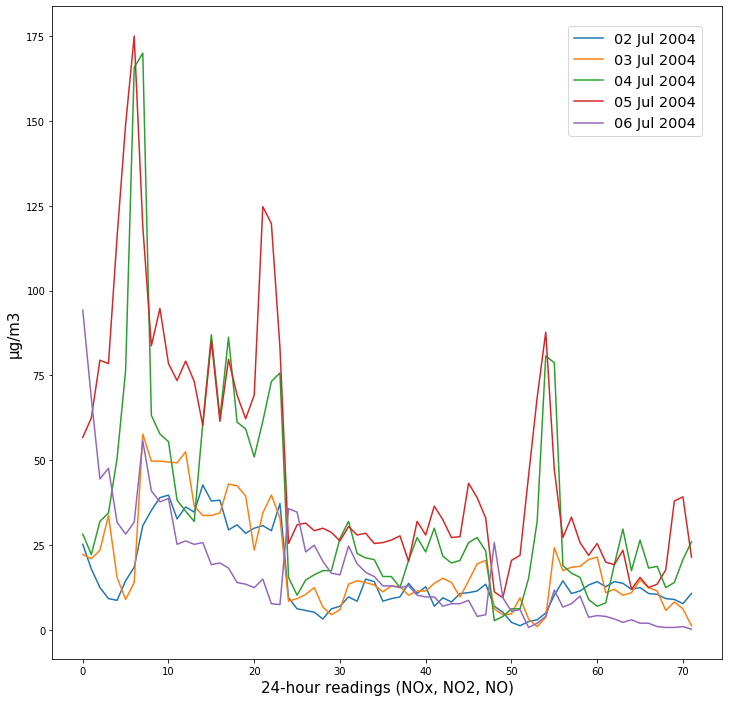

In [9]:
x=range(0, 72);
plt.figure(figsize=(12, 12))
plt.plot(x, bristol_day_aligned.iloc[0], label='02 Jul 2004')
plt.plot(x, bristol_day_aligned.iloc[1], label='03 Jul 2004')
plt.plot(x, bristol_day_aligned.iloc[2], label='04 Jul 2004')
plt.plot(x, bristol_day_aligned.iloc[3], label='05 Jul 2004')
plt.plot(x, bristol_day_aligned.iloc[4], label='06 Jul 2004')
plt.legend(bbox_to_anchor=(0.97, 0.97), loc='upper right', borderaxespad=0., fontsize='x-large')
plt.xlabel('24-hour readings (NOx, NO2, NO)', fontsize=15)
plt.ylabel('μg/m3', fontsize=15)
plt.show()

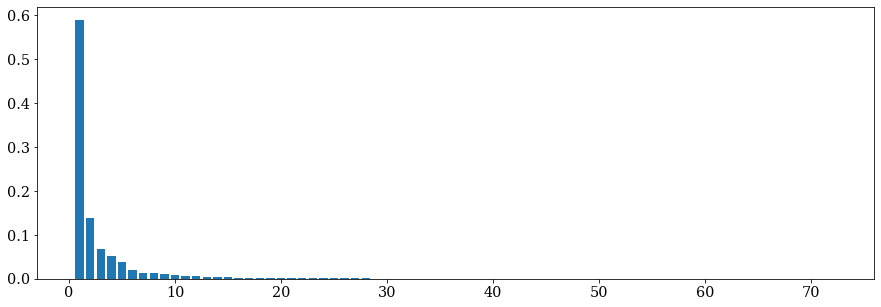

In [81]:
site1_day_aligned = bristol_day_aligned.query('SiteID == 1');
pca = PCA(n_components=72, random_state=0)
pca.fit(site1_day_aligned)
plt.figure(figsize=(15,5))
plt.bar(range(1,73), pca.explained_variance_ratio_)
plt.show()

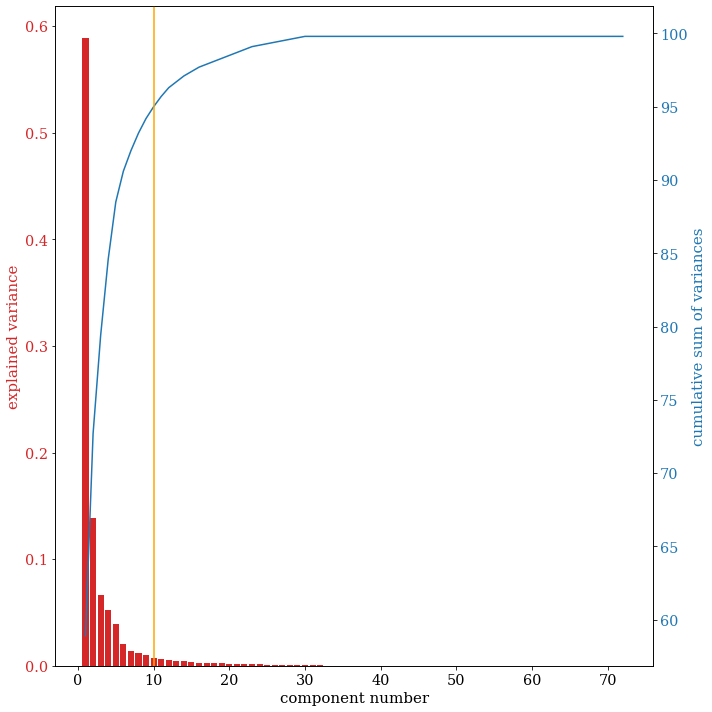

In [91]:
cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100) #cumulative sum of variance explained with [n] features
t = np.arange(1, 73, 1)
data1 = pca.explained_variance_ratio_
data2 = cum_var

fig, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_xlabel('component number', fontsize=15)
#ax1.set_xlim(1, 73)

color = 'tab:red'
ax1.set_ylabel('explained variance', color=color, fontsize=15)
ax1.bar(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('cumulative sum of variances', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.axvline(x=10, color='orange')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

 Focusing on the mean and first principal component, are there any significant patterns which emerge throughout the day? \hint{Think about car usage throughout the day.} What is different when interpreting the mean versus the first component? \hint{Do peaks signify the same thing in both cases?} Looking at the principal components only, are there any significant differences between the pollutants? Why could this be happening? \hint{You can refer to one of the limitations of PCA.}}

In [50]:
pca = PCA(n_components=24, random_state=0)
nox = bristol_day_aligned.iloc[:, range(0,24)]
no2 = bristol_day_aligned.iloc[:, range(24,48)]
no = bristol_day_aligned.iloc[:, range(48,72)]

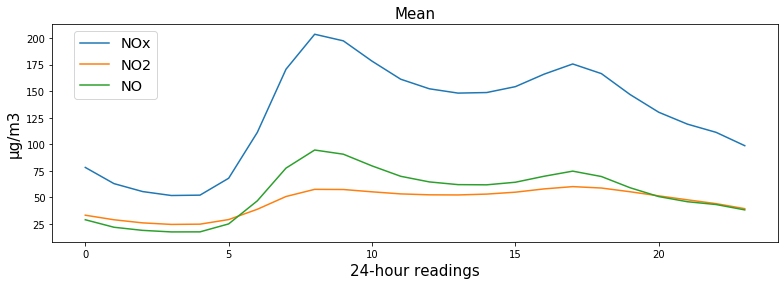

In [17]:
pca.fit(nox)
plt.figure(figsize=(13,4))
plt.plot(range(0,24), pca.mean_, label = 'NOx')
pca.fit(no2)
plt.plot(range(0,24), pca.mean_, label = 'NO2')
pca.fit(no)
plt.plot(range(0,24), pca.mean_, label = 'NO')
plt.xlabel('24-hour readings', fontsize=15)
plt.ylabel('μg/m3', fontsize=15)
plt.legend(bbox_to_anchor=(0.03, 0.97), loc='upper left', borderaxespad=0., fontsize='x-large')
plt.title('Mean', fontsize=15)
plt.show()

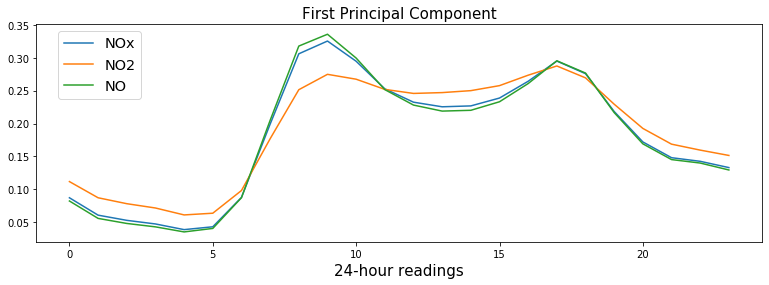

In [18]:
pca.fit(nox)
plt.figure(figsize=(13,4))
plt.plot(range(0,24), pca.components_[0,:], label = 'NOx')
pca.fit(no2)
plt.plot(range(0,24), pca.components_[0,:], label = 'NO2')
pca.fit(no)
plt.plot(range(0,24), pca.components_[0,:], label = 'NO')
plt.xlabel('24-hour readings', fontsize=15)
#plt.ylabel('μg/m3', fontsize=15)
plt.legend(bbox_to_anchor=(0.03, 0.97), loc='upper left', borderaxespad=0., fontsize='x-large')
plt.title('First Principal Component', fontsize=15)
plt.show()

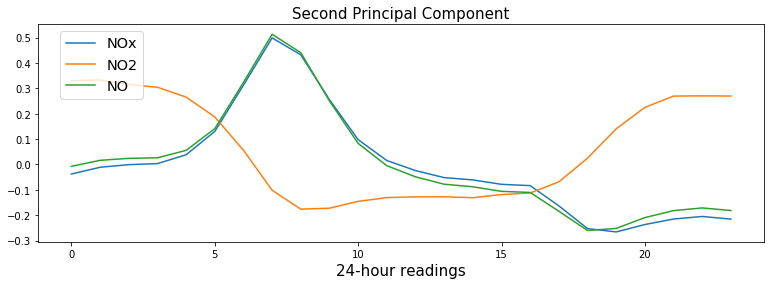

In [19]:
pca.fit(nox)
plt.figure(figsize=(13,4))
plt.plot(range(0,24), pca.components_[1,:], label = 'NOx')
pca.fit(no2)
plt.plot(range(0,24), pca.components_[1,:], label = 'NO2')
pca.fit(no)
plt.plot(range(0,24), pca.components_[1,:], label = 'NO')
plt.xlabel('24-hour readings', fontsize=15)
#plt.ylabel('μg/m3', fontsize=15)
plt.legend(bbox_to_anchor=(0.03, 0.97), loc='upper left', borderaxespad=0., fontsize='x-large')
plt.title('Second Principal Component', fontsize=15)
plt.show()

In [171]:
# 6.1
import mpctools.extensions.skext as sk
X = bristol_site_aligned.iloc[:,1:10]
y = bristol_site_aligned.iloc[:,10]
mws = sk.multi_way_split(y, [0.60, 0.15, 0.25], splitter=ShuffleSplit, random_state=0)
training_idx = mws[0]
validation_idx = mws[1]
testing_idx = mws[2]
X_train = X.iloc[training_idx]
X_val = X.iloc[validation_idx]
X_test = X.iloc[testing_idx]
y_train = y.iloc[training_idx]
y_val = y.iloc[validation_idx]
y_test = y.iloc[testing_idx]

In [21]:
print(X.shape[1])
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])
print(X_train.shape[0] + X_val.shape[0] + X_test.shape[0])

9
8937
2234
3724
14895


In [48]:
print("RMSE on training: {}".format(np.sqrt(((y[training_idx] - y[training_idx].mean()) ** 2).mean())))
print("RMSE on validation: {}".format(np.sqrt(((y[validation_idx] - y[validation_idx].mean()) ** 2).mean())))

dummy = DummyRegressor().fit(X_train, y_train)
preds_train = dummy.predict(y_train)
preds_validation = dummy.predict(y_val)
print("RMSE on training: {}".format(np.sqrt(mean_squared_error(preds_train, y_train))))
print("RMSE on validation: {}".format(np.sqrt(mean_squared_error(preds_validation, y_val))))

y_val.describe(percentiles=[0.25,0.50,0.75,0.90])

RMSE on training: 79.71384620780579
RMSE on validation: 80.18975180976564
RMSE on training: 79.71384620780579
RMSE on validation: 80.2050030835507


count    2234.000000
mean       99.884620
std        80.207705
min         0.750000
25%        42.000000
50%        81.875000
75%       134.437500
90%       195.200000
max       656.500000
Name: (NOx, 17), dtype: float64

In [97]:
lr = LinearRegression().fit(X_train, y_train);

preds_train = lr.predict(X_train)
preds_validation = lr.predict(X_val)

print("LinearRegressor RMSE on training: {}".format(np.sqrt(mean_squared_error(preds_train, y.iloc[training_idx]))))
print("LinearRegressor RMSE on validation: {}".format(np.sqrt(mean_squared_error(preds_validation, y.iloc[validation_idx]))))

LinearRegressor RMSE on training: 39.83472027954455
LinearRegressor RMSE on validation: 41.12740349422


In [98]:
lr = LinearRegression(normalize=True).fit(X_train, y_train);

preds_train = lr.predict(X_train)
preds_validation = lr.predict(X_val)

print("LinearRegressor RMSE on training: {}".format(np.sqrt(mean_squared_error(preds_train, y.iloc[training_idx]))))
print("LinearRegressor RMSE on validation: {}".format(np.sqrt(mean_squared_error(preds_validation, y.iloc[validation_idx]))))

LinearRegressor RMSE on training: 39.83472027954455
LinearRegressor RMSE on validation: 41.12740349422


In [96]:
lr = LinearRegression(normalize=True).fit(X_train, y_train)

coefs = lr.coef_

coefs_magn_sum = abs(coefs).sum()
coefs_importance = []

for coef in coefs:
    coefs_importance.append(abs(coef) / coefs_magn_sum * 100)


SiteIDS = [1, 2, 4, 6, 7, 10, 12, 14, 16]
table = pd.DataFrame(columns = ['Site ID (feature)', '% Relative importance'])
i=0;
for coef in coefs_importance:
    table = table.append({'Site ID (feature)' :  SiteIDS[i], '% Relative importance' :  coef}, ignore_index=True)
    i = i + 1;
    
table
#table.to_latex(index=False)

,Site ID (feature),% Relative importance
0,1.0,14.607843
1,2.0,1.257457
2,4.0,16.957058
3,6.0,0.859499
4,7.0,7.507408
5,10.0,10.085186
6,12.0,16.321242
7,14.0,11.947033
8,16.0,20.457275


In [172]:
knn = KNeighborsRegressor(n_jobs=-1).fit(X_train, y_train);

preds_train = knn.predict(X_train)
preds_validation = knn.predict(X_val)

print("KNN RMSE on training: {}".format(np.sqrt(mean_squared_error(preds_train, y_train))))
print("KNN RMSE on validation: {}".format(np.sqrt(mean_squared_error(preds_validation, y_val))))

KNN RMSE on training: 32.43647936515854
KNN RMSE on validation: 40.3071558368958


In [173]:
X_train.head(10)

NOx                                                               
            1       2       4       6      7      10     12       14      16
8550   348.25  486.75  154.75  301.50  178.0  583.00  594.0  1112.50  674.75
5582    27.25   37.50   93.25   31.00   25.0   49.75   86.0   257.75   35.50
3153    16.00   20.50   22.25  281.25   13.0   37.50   34.0   288.25   45.00
10322  552.00  182.75  396.50  554.25  172.0  251.25  208.0   935.75  568.50
13556   24.75   46.50   18.25   29.25   29.0   16.75   38.0   101.00   16.75
9712   153.00  277.00  301.50  210.67  115.0  252.75  239.0   946.75  326.25
4846    78.50   84.75   91.50  115.75   19.0  114.00  145.0   309.00  122.50
14582  165.00   78.50  183.50  222.00  277.0  361.25  254.0   341.75   98.50
12563   75.25  100.50   28.50  121.75   27.0   97.00  101.0   423.25   83.00
9263   161.75  185.00   79.25  151.00  113.0  261.25  392.0   477.50  347.00

In [118]:
ks = [2, 4, 8, 16, 32]
#ks = range(14, 19)
training_RMSEs = []
validation_RMSEs = []
for k in ks:
    model =KNeighborsRegressor(n_jobs=-1, n_neighbors=k).fit(X.iloc[training_idx], y.iloc[training_idx]);
    preds_train = model.predict(X.iloc[training_idx])
    preds_validation = model.predict(X.iloc[validation_idx])
    training_RMSEs.append(np.sqrt(mean_squared_error(preds_train, y.iloc[training_idx])))
    validation_RMSEs.append(np.sqrt(mean_squared_error(preds_validation, y.iloc[validation_idx])))

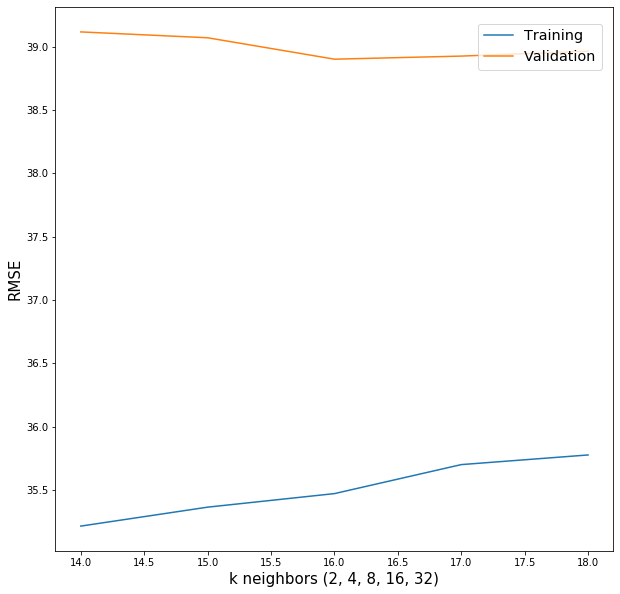

[39.11721258257359,
 39.07092093287694,
 38.901851355962386,
 38.9262347000385,
 38.96446746201794]

In [120]:
plt.figure(figsize=(10,10))
plt.plot(ks, training_RMSEs, label='Training')
plt.plot(ks, validation_RMSEs, label='Validation')
plt.axvline(x=8, color='red', label='Best value for k')
plt.xlabel('k neighbors (2, 4, 8, 16, 32)', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.legend(bbox_to_anchor=(0.98, 0.97), loc='upper right', borderaxespad=0., fontsize='x-large')
plt.show()

validation_RMSEs

In [133]:
max_depths = [2, 4, 8, 16, 32, 64]
dectree_training_RMSEs = []
dectree_validation_RMSEs = []
for d in max_depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=0).fit(X.iloc[training_idx], y.iloc[training_idx]);
    preds_train = model.predict(X.iloc[training_idx])
    preds_validation = model.predict(X.iloc[validation_idx])
    dectree_training_RMSEs.append(np.sqrt(mean_squared_error(preds_train, y.iloc[training_idx])))
    dectree_validation_RMSEs.append(np.sqrt(mean_squared_error(preds_validation, y.iloc[validation_idx])))

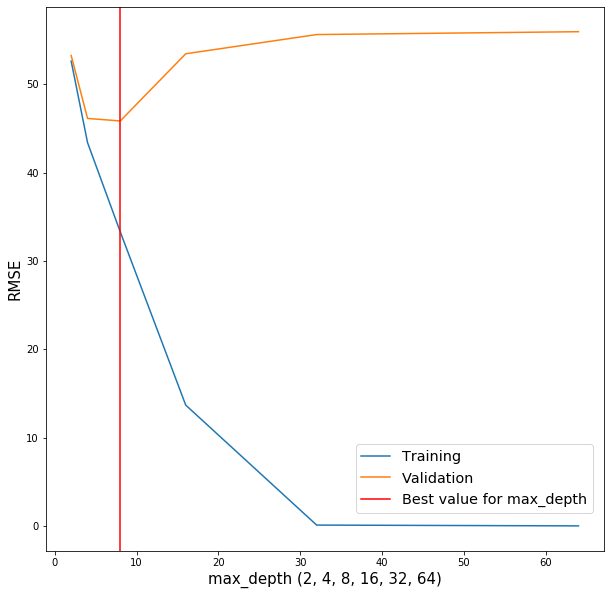

[53.25095179219833,
 46.12769116861275,
 45.84380928287788,
 53.4486396323909,
 55.62441997967441,
 55.9470657647145]

In [134]:
plt.figure(figsize=(10,10))
plt.plot(max_depths, dectree_training_RMSEs, label='Training')
plt.plot(max_depths, dectree_validation_RMSEs, label='Validation')
plt.axvline(x=8, color='red', label='Best value for max_depth')
plt.xlabel('max_depth (2, 4, 8, 16, 32, 64)', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.legend(bbox_to_anchor=(0.98, 0.07), loc='lower right', borderaxespad=0., fontsize='x-large')
plt.show()
dectree_validation_RMSEs

In [162]:
import mpctools.extensions.skext as sk
X = bristol_site_aligned.iloc[:,1:10]
y = bristol_site_aligned.iloc[:,10]
mws = sk.multi_way_split(y, [0.75, 0.25], splitter=ShuffleSplit, random_state=0)
training_idx = mws[0]
testing_idx = mws[1]
X_train = X.iloc[training_idx]
X_test = X.iloc[testing_idx]
y_train = y.iloc[training_idx]
y_test = y.iloc[testing_idx]

In [169]:
dummy = DummyRegressor().fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)
print("Baseline RMSE on training: {}".format(np.sqrt(mean_squared_error(dummy_preds, y_test))))

lr = LinearRegression().fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print("Linear Regressor RMSE on training: {}".format(np.sqrt(mean_squared_error(lr_preds, y_test))))

knn = KNeighborsRegressor(n_jobs=-1, n_neighbors=8).fit(X_train, y_train);
knn_preds = knn.predict(X_test)
print("KNN Regressor RMSE on training: {}".format(np.sqrt(mean_squared_error(knn_preds, y_test))))

dectree = DecisionTreeRegressor(max_depth=8, random_state=0).fit(X_train, y_train);
dectree_preds = dectree.predict(X_test)
print("Decision Tree Regressor RMSE on training: {}".format(np.sqrt(mean_squared_error(dectree_preds, y_test))))

Baseline RMSE on training: 79.24303575666619
Linear Regressor RMSE on training: 41.159990793085946
KNN Regressor RMSE on training: 39.51898188326218
Decision Tree Regressor RMSE on training: 42.613033041444936
